**Proyek Pertama _Membuat Model NLP dengan TensorFlow**

****
- Nama : M Rama Nopan Ariyadi
- PT : Universitas Multi Data Palembang
- Kelas : M 02



In [1]:
import pandas as pd


In [2]:
#ubah dataset menjadi dataframe
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [3]:
# karena data berupa kategorikal
# lakukan proses one-hot-encoding dan buat dataframe baru
category = pd.get_dummies(df.Emotion)
df_new = pd.concat([df, category], axis = 1)
df_new = df_new.drop(columns = 'Emotion')
df_new

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      21459 non-null  object
 1   anger     21459 non-null  uint8 
 2   fear      21459 non-null  uint8 
 3   happy     21459 non-null  uint8 
 4   love      21459 non-null  uint8 
 5   sadness   21459 non-null  uint8 
 6   surprise  21459 non-null  uint8 
dtypes: object(1), uint8(6)
memory usage: 293.5+ KB


In [5]:
# ubah nilai dataframe ke dalam tipe data numpy array dengan atribut values
teks = df_new['Text'].values
emotion = df_new[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [6]:
from sklearn.model_selection import train_test_split
teks_latih, teks_test, emotion_latih, emotion_test = train_test_split(teks, emotion, test_size=0.2)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
 
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
#setelah melebih 90% akurasi maka training akan berhenti
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nakurasi lebih besar dari 90%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [11]:

history = model.fit(padded_latih, emotion_latih, epochs=30, 
                    validation_data=(padded_test, emotion_test), 
                    verbose=2, callbacks=[callbacks])

Epoch 1/30
537/537 - 13s - loss: 1.4719 - accuracy: 0.3723 - val_loss: 1.0745 - val_accuracy: 0.6116 - 13s/epoch - 24ms/step
Epoch 2/30
537/537 - 5s - loss: 0.8665 - accuracy: 0.6712 - val_loss: 0.7001 - val_accuracy: 0.7330 - 5s/epoch - 9ms/step
Epoch 3/30
537/537 - 4s - loss: 0.5718 - accuracy: 0.7675 - val_loss: 0.5382 - val_accuracy: 0.8320 - 4s/epoch - 7ms/step
Epoch 4/30
537/537 - 4s - loss: 0.3712 - accuracy: 0.8751 - val_loss: 0.4221 - val_accuracy: 0.8723 - 4s/epoch - 7ms/step
Epoch 5/30
537/537 - 4s - loss: 0.3007 - accuracy: 0.8986 - val_loss: 0.3788 - val_accuracy: 0.8756 - 4s/epoch - 7ms/step
Epoch 6/30
537/537 - 3s - loss: 0.2356 - accuracy: 0.9229 - val_loss: 0.3734 - val_accuracy: 0.8924 - 3s/epoch - 6ms/step
Epoch 7/30
537/537 - 3s - loss: 0.1857 - accuracy: 0.9410 - val_loss: 0.4099 - val_accuracy: 0.8963 - 3s/epoch - 6ms/step
Epoch 8/30
537/537 - 4s - loss: 0.1593 - accuracy: 0.9485 - val_loss: 0.4221 - val_accuracy: 0.8991 - 4s/epoch - 7ms/step
Epoch 9/30
537/537 - 

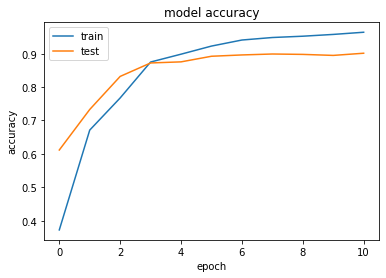

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()